In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,roc_auc_score
import re

In [2]:
df=pd.read_csv(r'D:\DA Projects\4- Feature Extraction and Price Prediction for Mobile Phones\dataset\Processed_Flipdata - Processed_Flipdata.csv')

In [3]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
df.shape

(541, 12)

In [5]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(541, 11)

In [7]:
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [8]:
df.nunique()

Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [9]:
for col in df.columns:
    print(df[col].value_counts())

Model
realme C55               9
vivo Y16                 9
REDMI Note 12 Pro 5G     9
SAMSUNG Galaxy A14 5G    9
SAMSUNG Galaxy F14 5G    8
                        ..
SAMSUNG Galaxy A04e      1
SAMSUNG Galaxy S23 5G    1
LAVA Z21                 1
Tecno Spark 8T           1
OPPO A77                 1
Name: count, Length: 187, dtype: int64
Colour
Yellow            12
Black              8
Power Black        8
Royal Blue         8
Midnight Black     7
                  ..
Flame Red          1
Oxygen Green       1
Cyan               1
Awesome Lime       1
Sky Blue           1
Name: count, Length: 275, dtype: int64
Memory
128    259
64     169
256     55
32      52
16       6
Name: count, dtype: int64
RAM
4    186
8    157
6    121
3     40
2     37
Name: count, dtype: int64
Battery_
5000    389
6000     42
4500     26
5080      6
4980      6
4300      5
800       5
4400      5
4200      5
4700      4
1000      4
4323      3
4600      3
4270      3
4830      3
1020      3
5200      2
4610 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [11]:
df['Prize']=df['Prize'].str.replace(',','').astype(int)
df['Rear Camera']=df['Rear Camera'].str.replace('MP','').astype(int)
df['Front Camera']=df['Front Camera'].str.extract('(\d+)').astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pk\AppData\Local\Temp\ipykernel_7928\2230993825.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Front Camera']=df['Front Camera'].str.extract('(\d+)').astype(int)


In [12]:
df['Prize'].dtype

dtype('int64')

In [13]:
df.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera        int64
Front Camera       int64
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

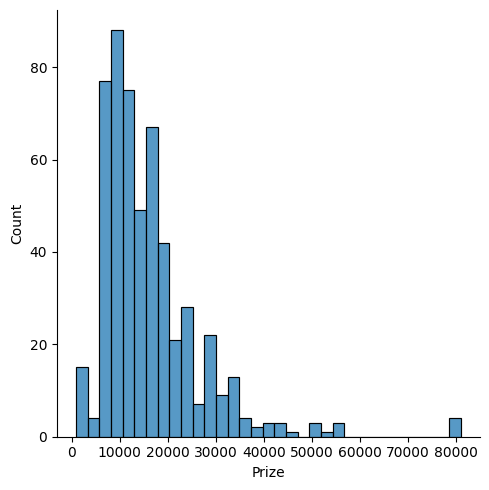

In [14]:
sns.displot(df['Prize'])

In [15]:
df['Model']=df['Model'].map(df.groupby('Model')['Prize'].median())


In [16]:
df['Colour']=df['Colour'].map(df.groupby('Colour')['Prize'].median())

In [17]:
df['Processor_']=df['Processor_'].map(df.groupby('Processor_')['Prize'].median())

In [18]:
df.tail()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,79999.0,79999.0,256,8,3900,50,12,0,15.49,79999.0,79999
537,5998.0,5998.0,32,2,3100,5,2,0,12.70,7999.0,5998
538,9990.0,9290.0,64,4,5000,50,8,0,16.76,8649.0,9990
539,40999.0,38999.0,128,8,5000,50,32,0,16.26,40999.0,38999
540,15999.0,15999.0,128,4,5000,50,8,0,16.66,12234.5,15999


In [19]:
df.dtypes

Model            float64
Colour           float64
Memory             int64
RAM                int64
Battery_           int64
Rear Camera        int64
Front Camera       int64
AI Lens            int64
Mobile Height    float64
Processor_       float64
Prize              int64
dtype: object

In [20]:
df.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
Model,1.000000,0.904704,0.546246,0.517856,-0.040546,0.409110,0.532098,-0.153530,0.170416,0.977208,0.995386
Colour,0.904704,1.000000,0.494624,0.434910,-0.072279,0.354497,0.470399,-0.137067,0.111830,0.879547,0.904298
Memory,0.546246,0.494624,1.000000,0.625284,-0.053210,0.530615,0.496865,-0.094442,0.063163,0.536152,0.566660
RAM,0.517856,0.434910,0.625284,1.000000,-0.104923,0.439558,0.493861,-0.082622,0.092951,0.522452,0.532024
Battery_,-0.040546,-0.072279,-0.053210,-0.104923,1.000000,0.198260,0.032970,0.150156,0.695641,-0.025378,-0.034297
Rear Camera,0.409110,0.354497,0.530615,0.439558,0.198260,1.000000,0.505378,-0.043597,0.239883,0.374774,0.410367
Front Camera,0.532098,0.470399,0.496865,0.493861,0.032970,0.505378,1.000000,-0.111779,0.208012,0.512595,0.532321
AI Lens,-0.153530,-0.137067,-0.094442,-0.082622,0.150156,-0.043597,-0.111779,1.000000,0.052018,-0.161502,-0.153691
Mobile Height,0.170416,0.111830,0.063163,0.092951,0.695641,0.239883,0.208012,0.052018,1.000000,0.190782,0.176009
Processor_,0.977208,0.879547,0.536152,0.522452,-0.025378,0.374774,0.512595,-0.161502,0.190782,1.000000,0.973857


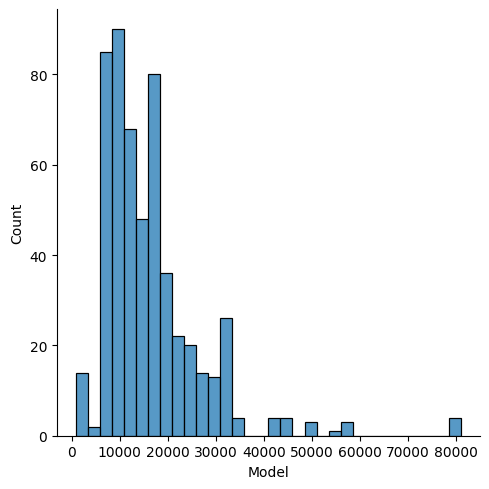

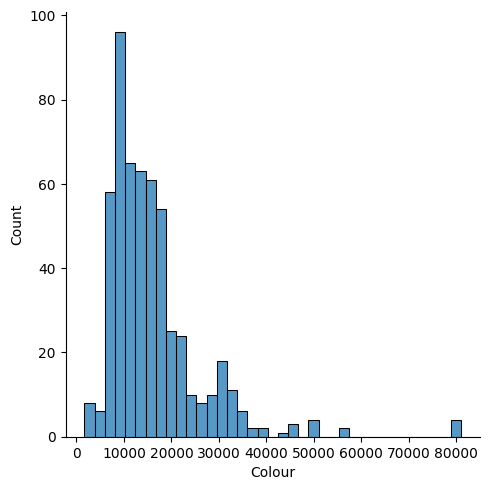

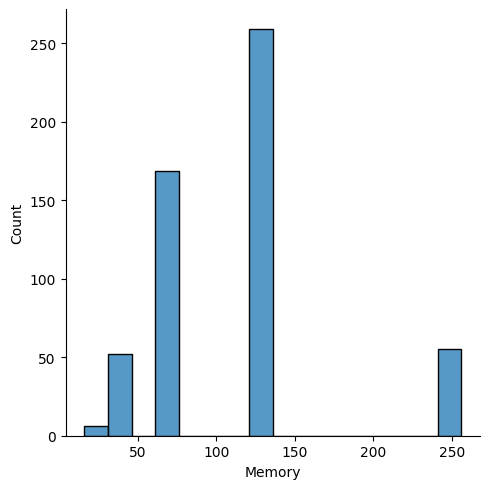

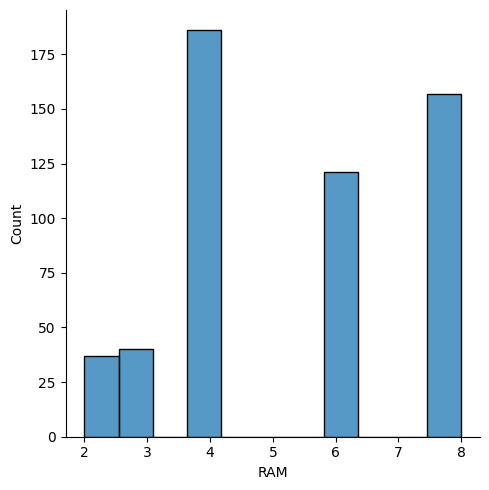

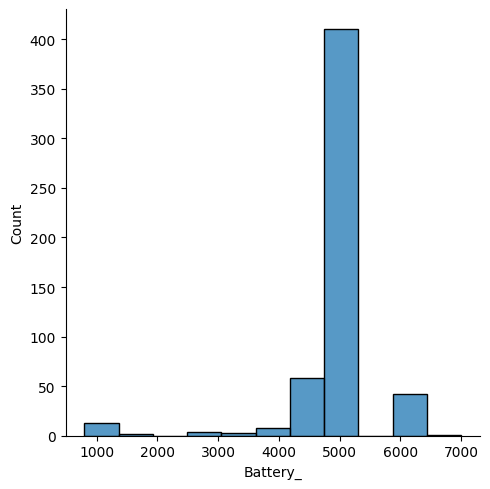

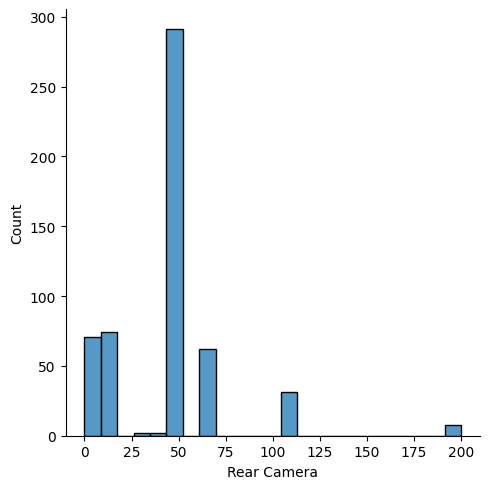

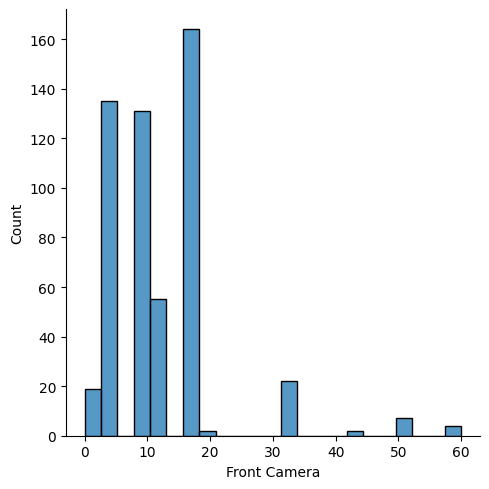

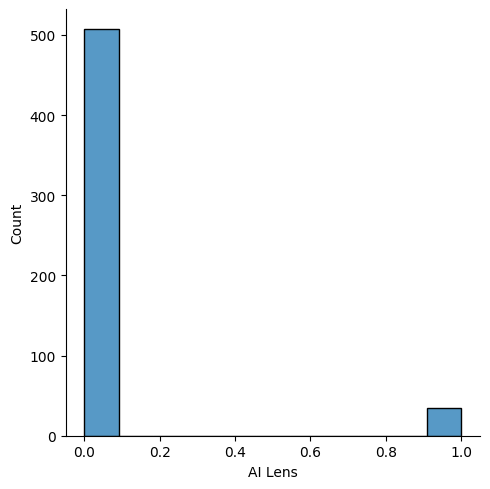

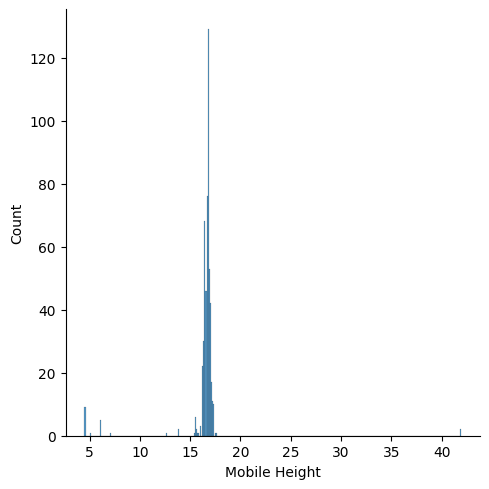

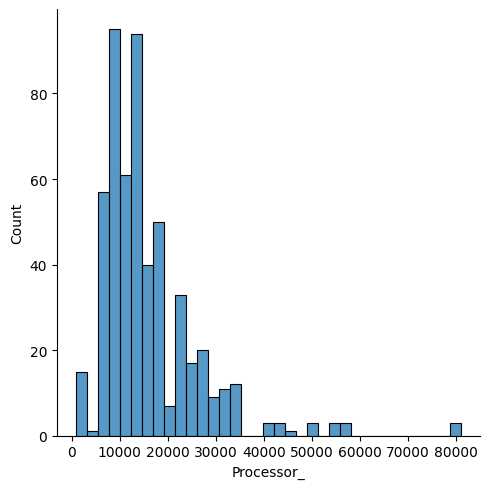

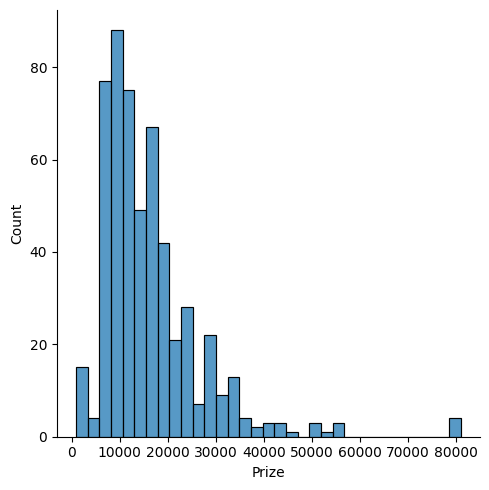

In [21]:
for col in df.columns:
    sns.displot(data=df,x=col)

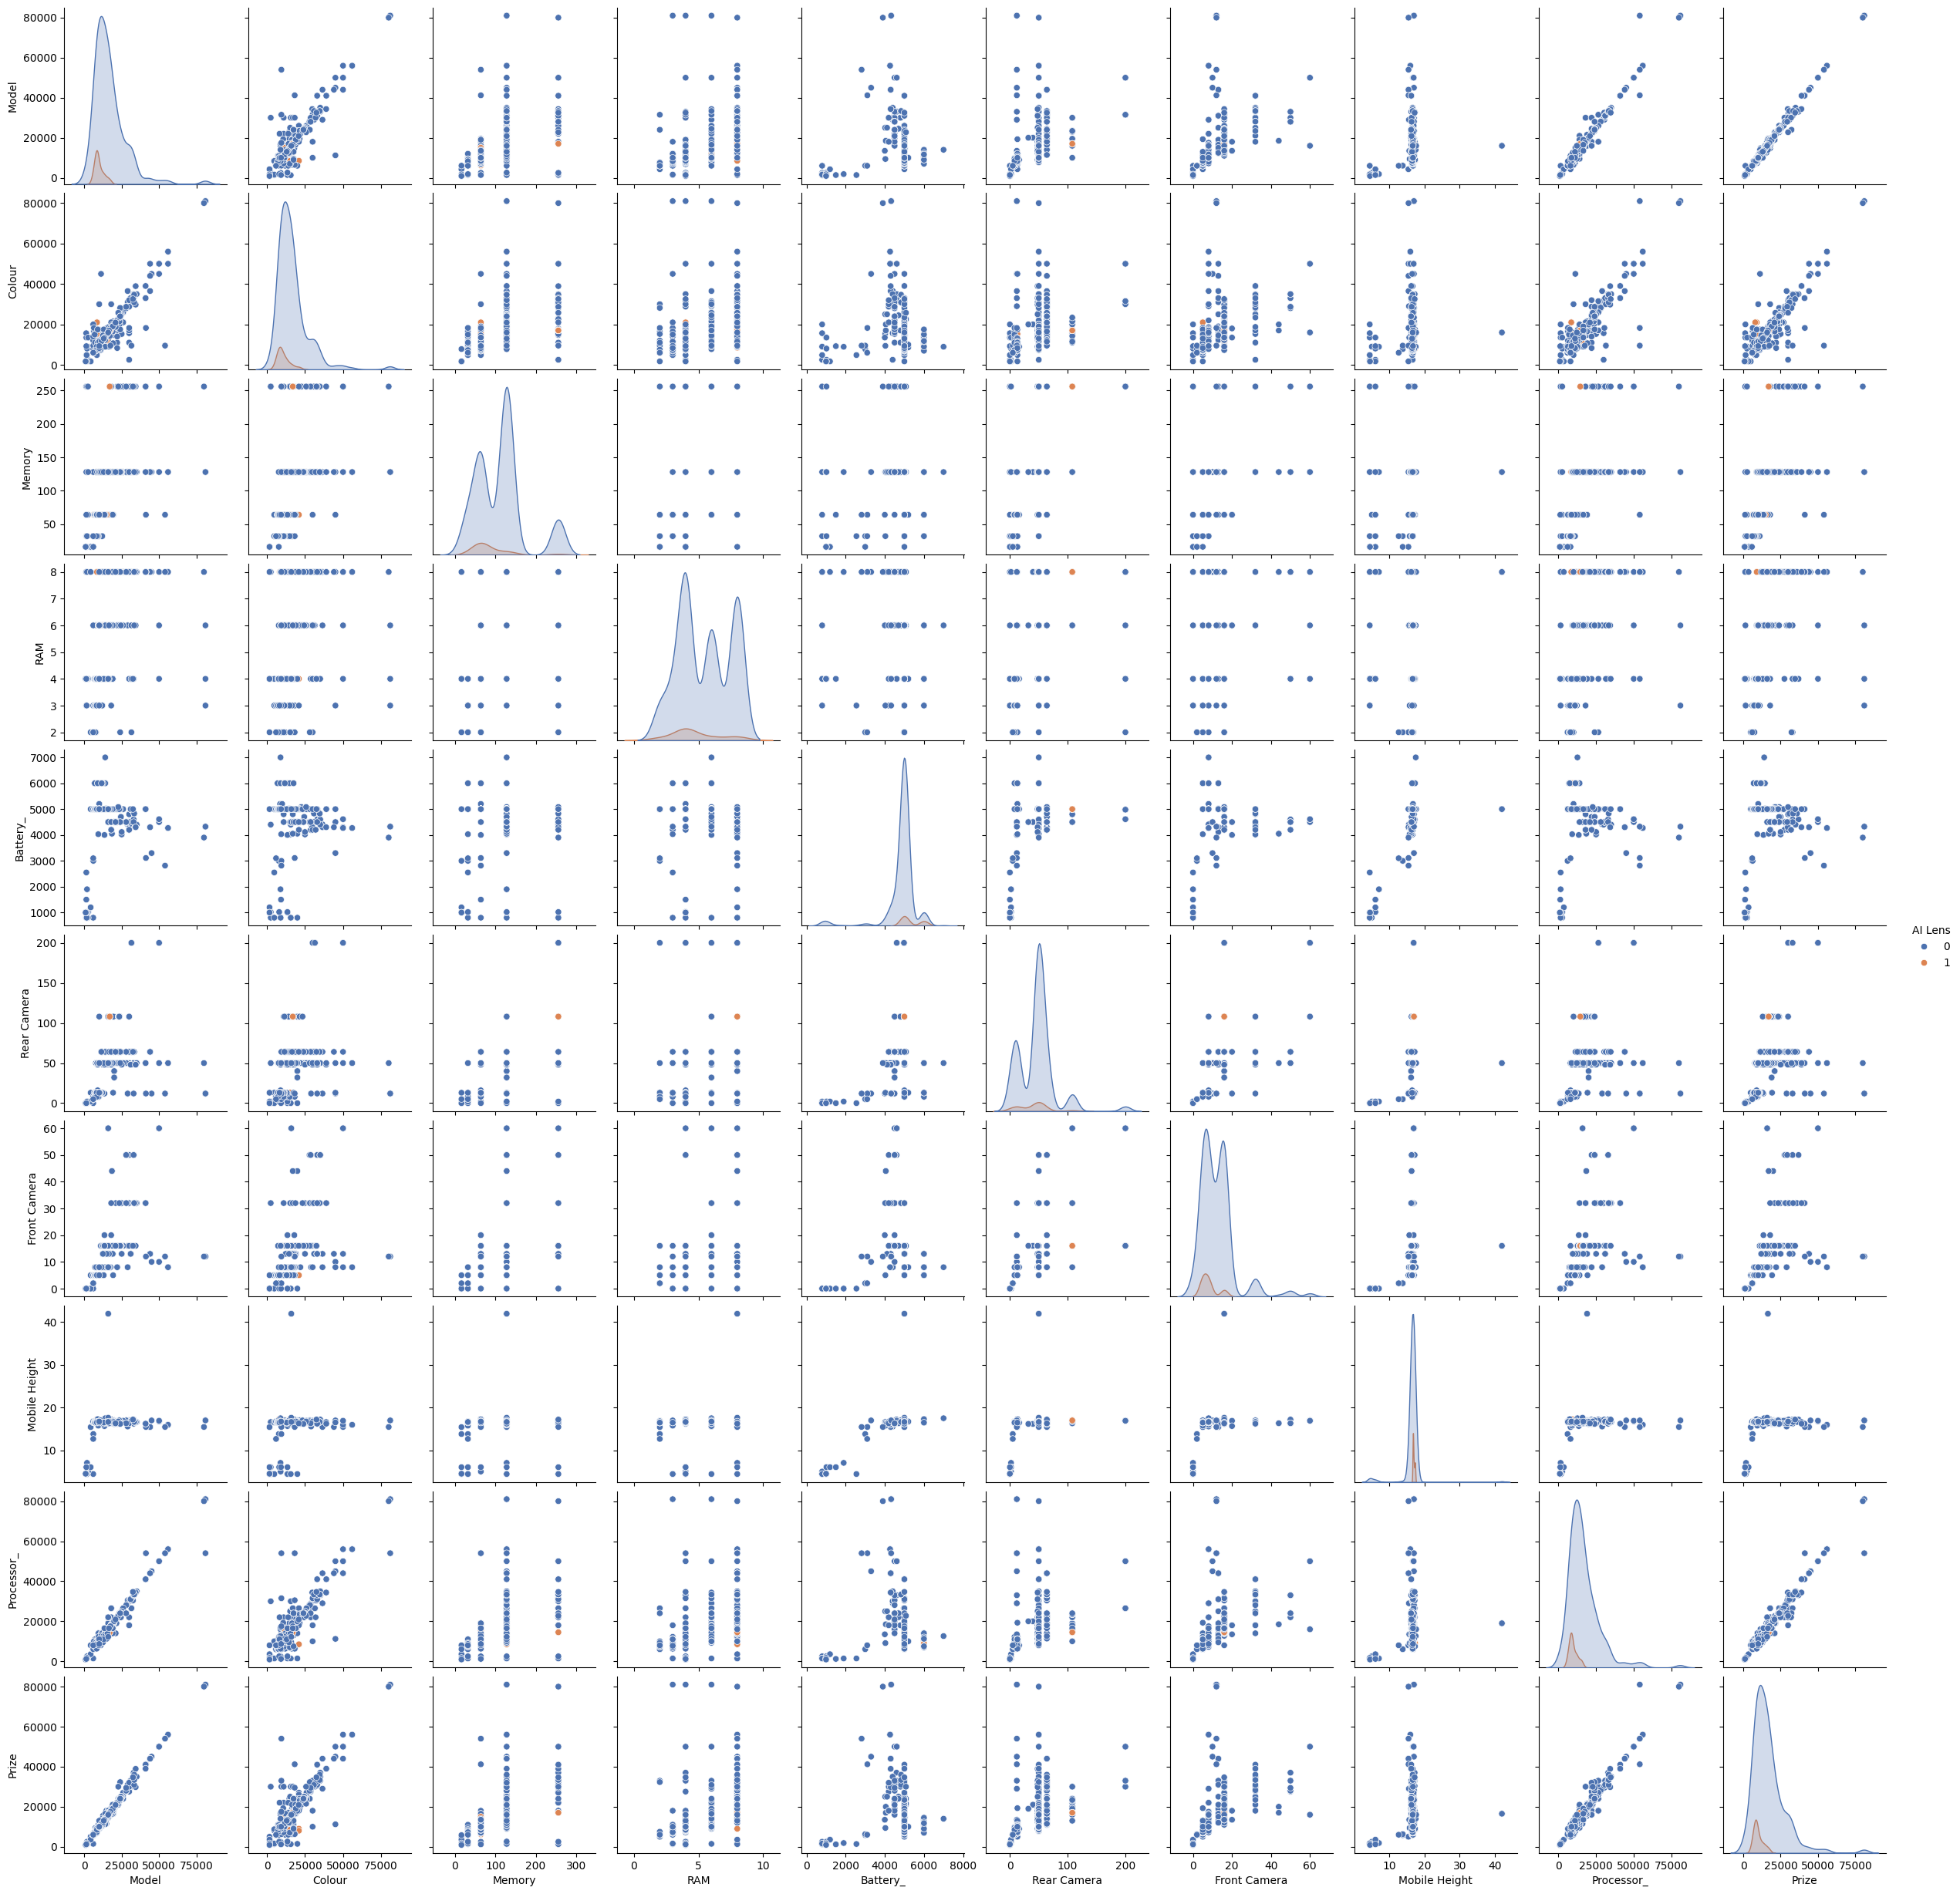

In [22]:
sns.pairplot(data=df,hue='AI Lens',palette='deep')

In [23]:
df.skew()

Model            2.464420
Colour           2.767982
Memory           1.029704
RAM              0.067617
Battery_        -3.304250
Rear Camera      1.799491
Front Camera     2.492864
AI Lens          3.612638
Mobile Height    1.171778
Processor_       2.419650
Prize            2.425579
dtype: float64

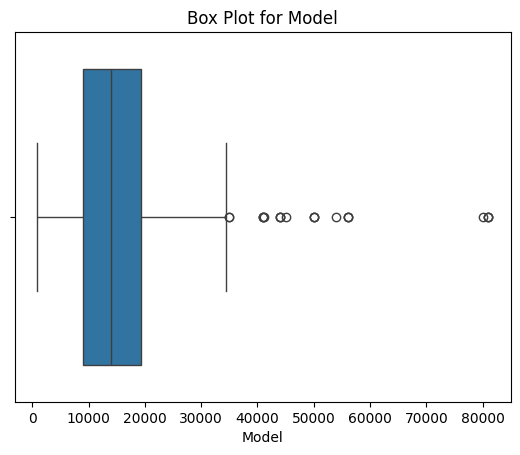

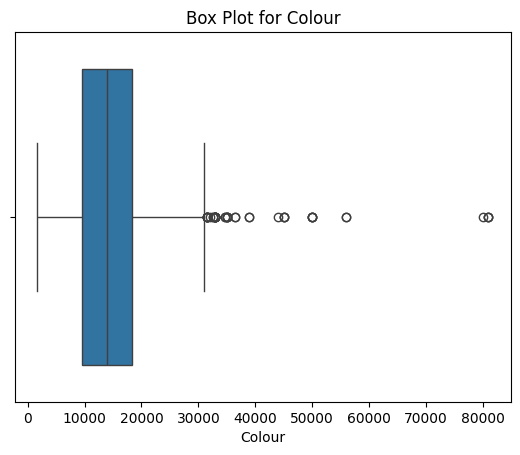

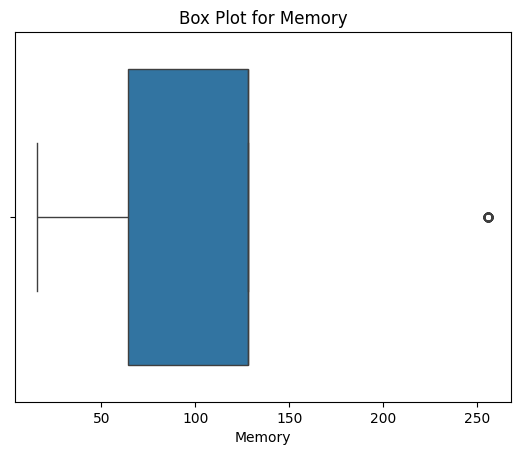

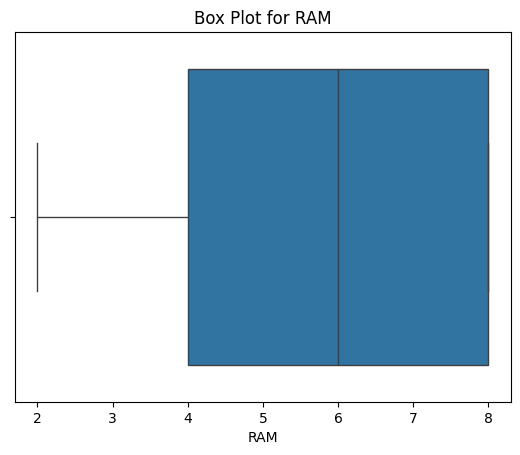

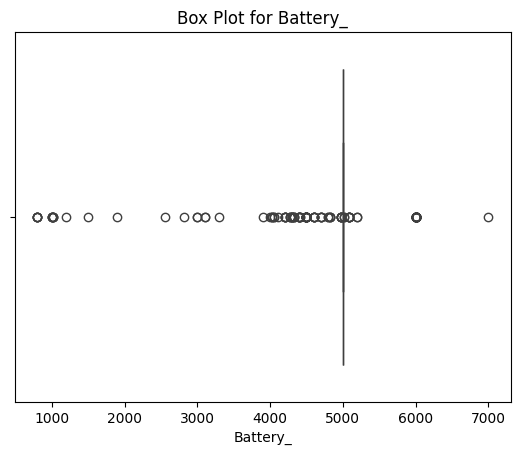

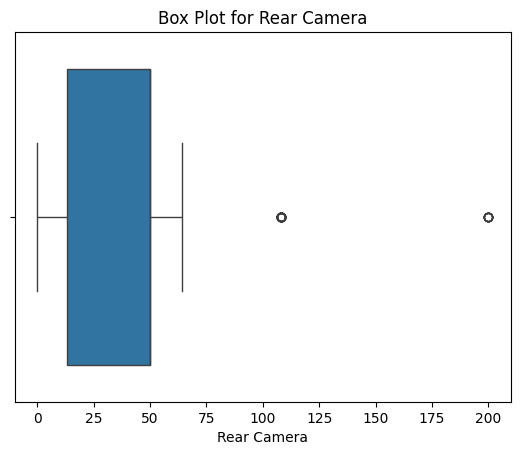

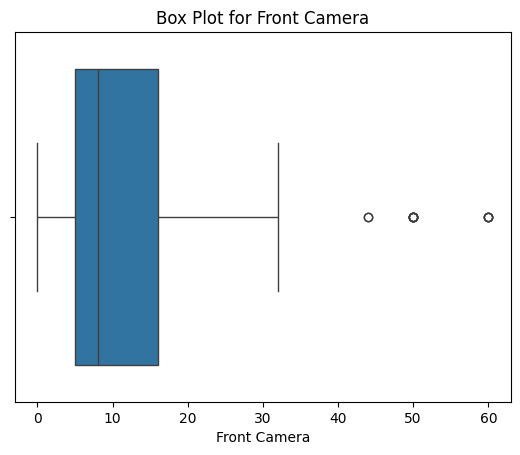

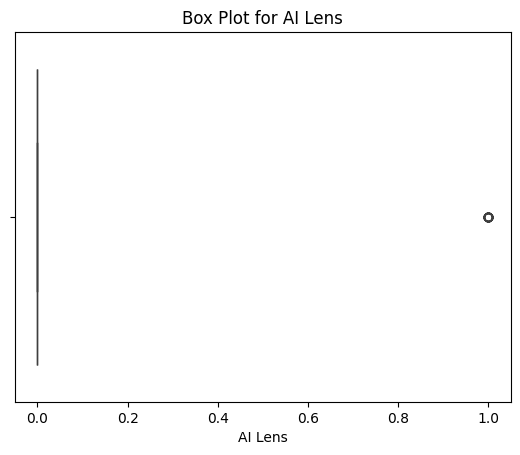

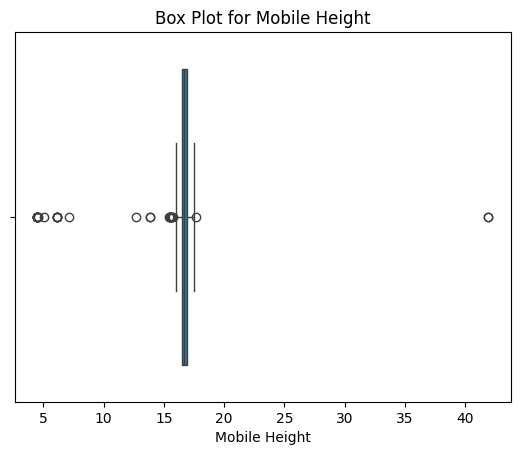

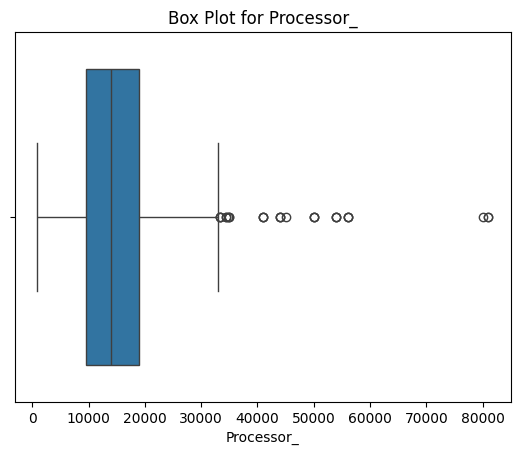

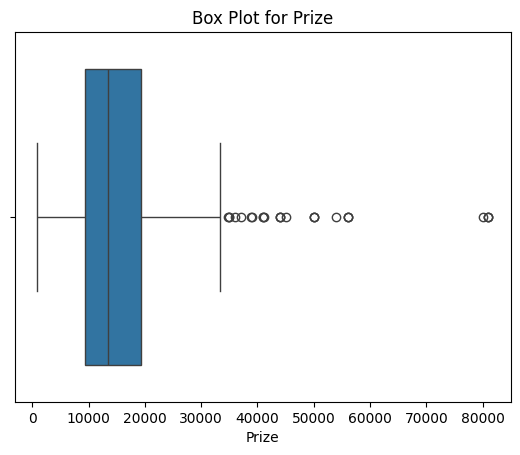

In [24]:
for col in df.columns:
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

In [25]:
from scipy.stats import zscore

In [26]:
df['zscore_ai_lens']=zscore(df['AI Lens'])

In [27]:
(df['zscore_ai_lens']>3).value_counts()

zscore_ai_lens
False    507
True      34
Name: count, dtype: int64

In [28]:
df.drop(labels='zscore_ai_lens',axis=1,inplace=True)

In [29]:
# Divide the dataset into dependent and independent features
x=df.drop('Prize',axis=1)
y=df['Prize']

In [30]:
# Divide into train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
# Initialize the scaler
scaler=StandardScaler()

In [32]:
# Normalize/standarized the values 
x_train=scaler.fit_transform(X=x_train)
x_test=scaler.transform(x_test)

In [33]:
models={
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'Randomforest':RandomForestRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}

In [34]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    name=list(models.keys())[i]
    print(name)
    
    # Metrics
    mse=mean_squared_error(y_pred,y_test)
    mae=mean_absolute_error(y_pred,y_test)
    rmse=root_mean_squared_error(y_pred,y_test)
    r2=r2_score(y_pred,y_test)

    # Print the score
    print('mean_squared_error:',mse)
    print('mean_absolute_error:',mae)
    print('root_mean_squared_error:',rmse)
    print('r2_score:',r2)
    print('=========================================')

LinearRegression
mean_squared_error: 658670.9035427152
mean_absolute_error: 564.1049849079855
root_mean_squared_error: 811.5854259058101
r2_score: 0.9951812794137592
DecisionTreeRegressor
mean_squared_error: 1695820.871559633
mean_absolute_error: 452.1192660550459
root_mean_squared_error: 1302.2368722930682
r2_score: 0.9879469215544182
SVR
mean_squared_error: 140091712.5919848
mean_absolute_error: 6940.1920525103205
root_mean_squared_error: 11836.03449606264
r2_score: -49947.72058511796
KNeighborsRegressor
mean_squared_error: 9770228.754862385
mean_absolute_error: 1625.869724770642
root_mean_squared_error: 3125.7365139855256
r2_score: 0.9038032059891409
Randomforest
mean_squared_error: 1984771.4582711007
mean_absolute_error: 562.2983486238531
root_mean_squared_error: 1408.8191716012034
r2_score: 0.9835707194437534
GradientBoostingRegressor
mean_squared_error: 1454744.3465232258
mean_absolute_error: 603.962007182687
root_mean_squared_error: 1206.1278317505262
r2_score: 0.988309753162730